<a href="https://colab.research.google.com/github/sesidhar-7/final_proj/blob/main/optic_disc_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glaucoma-datasets/models/refuge_clf.pkl
/kaggle/input/glaucoma-datasets/models/refuge_segmentation.pth
/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/n0166.jpg
/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/n0294.jpg
/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/T0247.jpg
/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/n0220.jpg
/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/n0046.jpg
/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/V0190.jpg
/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/n0194.jpg
/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/g0010.jpg
/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/V0228.jpg
/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/T0320.jpg
/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/V0080.jpg
/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/V0287.jpg
/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/V0177.jpg
/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/V0075.jpg
/

In [ ]:
!pip install segmentation-models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import keras
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Segmentation Models: using `tf.keras` framework.


In [ ]:
import glob
import cv2
import os
images1 = glob.glob("/kaggle/input/glaucoma-datasets/REFUGE/Images_Square/*.jpg")
images1.sort()
masks1 = glob.glob("/kaggle/input/glaucoma-datasets/REFUGE/Masks_Square/*.png")
masks1.sort()
images2 = glob.glob("/kaggle/input/glaucoma-datasets/ORIGA/Images_Square/*.jpg")
images2.sort()
masks2 = glob.glob("/kaggle/input/glaucoma-datasets/ORIGA/Masks_Square/*.png")
masks2.sort()
images3 = glob.glob("/kaggle/input/glaucoma-datasets/G1020/Images_Square/*.jpg")
images3.sort()
masks3 = glob.glob("/kaggle/input/glaucoma-datasets/G1020/Masks_Square/*.png")
masks3.sort()

In [ ]:
import os
image=[]
mask=[]
for x,y in zip(images1,masks1):
  im=cv2.imread(x,cv2.IMREAD_COLOR)
  im=cv2.resize(im,(128,128))
  im=im/255
  image.append(im)
  ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
  ma=cv2.resize(ma,(128,128),interpolation=cv2.INTER_NEAREST)
  ma=ma/255
  ma=np.expand_dims(ma,axis=-1)
  mask.append(ma)

for x,y in zip(images2,masks2):
  im=cv2.imread(x,cv2.IMREAD_COLOR)
  im=cv2.resize(im,(128,128))
  im=im/255
  image.append(im)
  ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
  ma=cv2.resize(ma,(128,128),interpolation=cv2.INTER_NEAREST)
  ma=ma/255
  ma=np.expand_dims(ma,axis=-1)
  mask.append(ma)

for x,y in zip(images3,masks3):
  im=cv2.imread(x,cv2.IMREAD_COLOR)
  im=cv2.resize(im,(128,128))
  im=im/255
  image.append(im)
  ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
  ma=cv2.resize(ma,(128,128),interpolation=cv2.INTER_NEAREST)
  ma=ma/255
  ma=np.expand_dims(ma,axis=-1)
  mask.append(ma)

In [ ]:
img_array=np.array(image)
mask_array=np.array(mask)
mask_array=mask_array.astype(np.float32)
print(mask_array.shape)

(2870, 128, 128, 1)


In [ ]:
np.unique(mask_array)

array([0.        , 0.00392157, 0.00784314], dtype=float32)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
a,n,h, w = mask_array.shape
train_masks_reshaped = mask_array.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(a,n, h, w)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from tensorflow.keras.utils import to_categorical
mask_array=to_categorical(train_masks_encoded_original_shape,num_classes=3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(img_array,mask_array,test_size=0.20)
print(y_train.dtype,y_test.dtype)

float32 float32


In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2296, 128, 128, 3),
 (574, 128, 128, 3),
 (2296, 128, 128, 3),
 (574, 128, 128, 3))

In [ ]:
import segmentation_models as sm
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from tensorflow.keras.utils import plot_model
sm.set_framework('tf.keras')
sm.framework()
BACKBONE = 'efficientnetb1'

preprocess_input = get_preprocessing(BACKBONE)
model = Unet(BACKBONE, encoder_weights='imagenet',input_shape=(128,128,3),activation='softmax',classes=3)
#plot_model(model)

27164032/27164032 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam',loss=sm.losses.DiceLoss(),metrics = ['accuracy',tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.AUC(),sm.metrics.IOUScore(),sm.metrics.FScore()])

In [ ]:
csv=tf.keras.callbacks.CSVLogger('model-1.csv')
history=model.fit(x_train,
          y_train,
          batch_size=2,
          epochs=25,
          validation_data=(x_test, y_test),callbacks=csv)

Epoch 1/25


2024-05-04 03:47:25.314518: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1148/1148 [==============================] - 138s 60ms/step - loss: 0.4269 - accuracy: 0.9848 - recall: 0.9814 - precision: 0.9872 - auc: 0.9949 - iou_score: 0.5238 - f1-score: 0.5731 - val_loss: 0.4109 - val_accuracy: 0.9935 - val_recall: 0.9935 - val_precision: 0.9935 - val_auc: 0.9958 - val_iou_score: 0.5430 - val_f1-score: 0.5891
Epoch 2/25
1148/1148 [==============================] - 66s 58ms/step - loss: 0.3110 - accuracy: 0.9943 - recall: 0.9943 - precision: 0.9943 - auc: 0.9966 - iou_score: 0.6322 - f1-score: 0.6890 - val_loss: 0.1248 - val_accuracy: 0.9961 - val_recall: 0.9961 - val_precision: 0.9961 - val_auc: 0.9980 - val_iou_score: 0.7975 - val_f1-score: 0.8752
Epoch 3/25
1148/1148 [==============================] - 66s 58ms/step - loss: 0.1122 - accuracy: 0.9965 - recall: 0.9965 - precision: 0.9965 - auc: 0.9982 - iou_score: 0.8135 - f1-score: 0.8878 - val_loss: 0.1325 - val_accuracy: 0.9961 - val_recall: 0.9961 - val_precision: 0.9961 - val_auc: 0.9978 - val_iou_score: 0.

/tmp/ipykernel_32/3250039954.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
/tmp/ipykernel_32/3250039954.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,10))


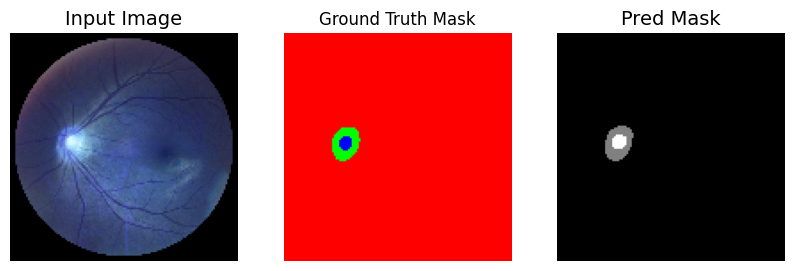

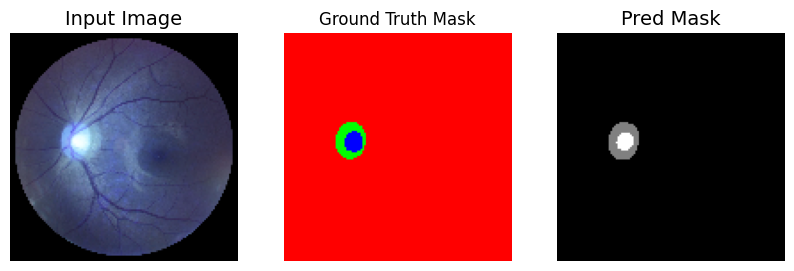

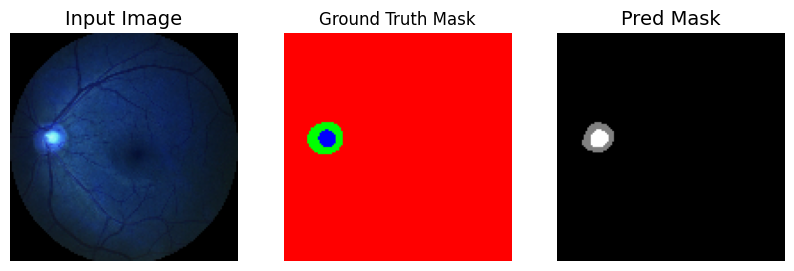

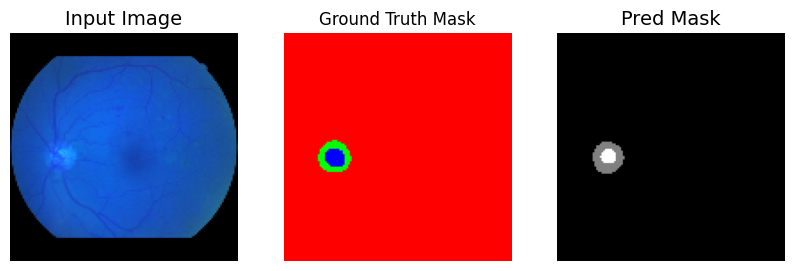

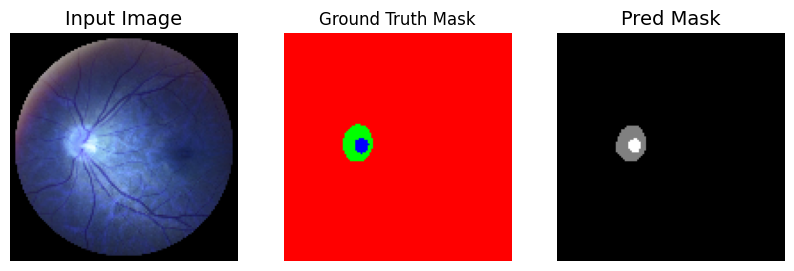

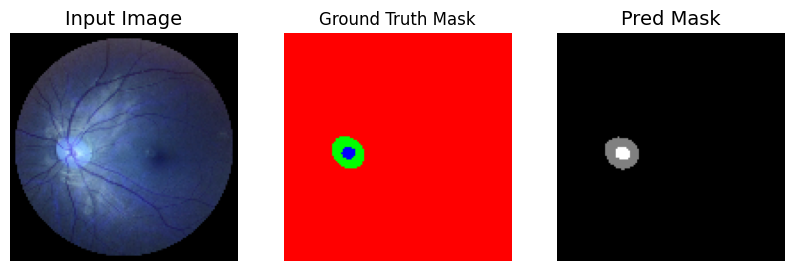

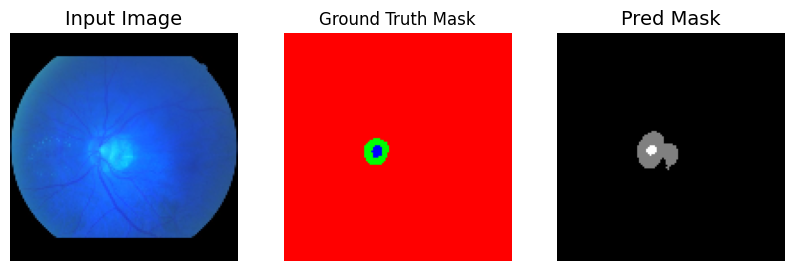

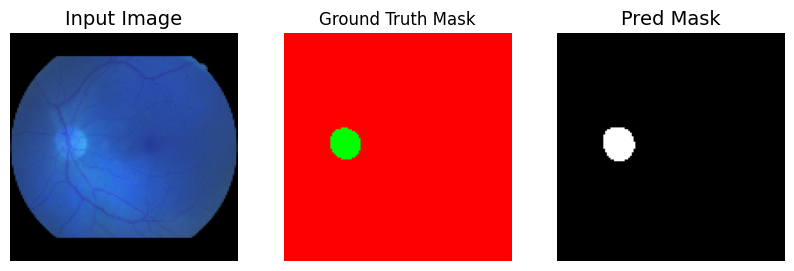

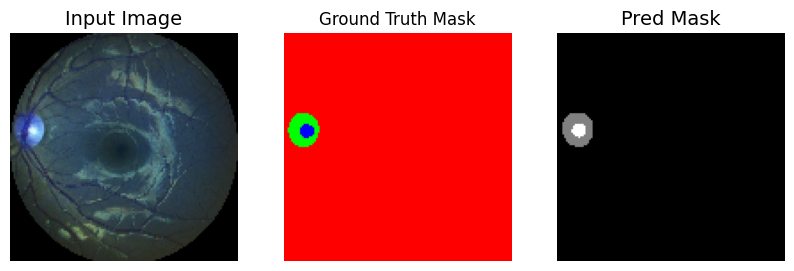

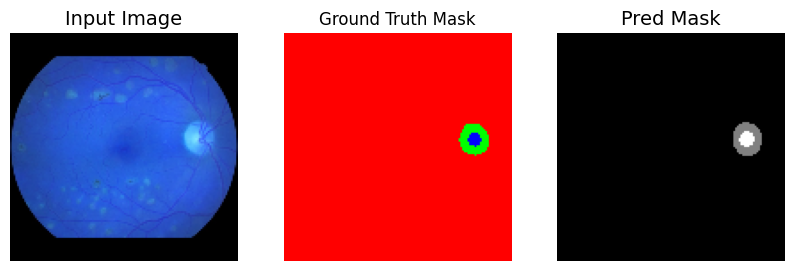

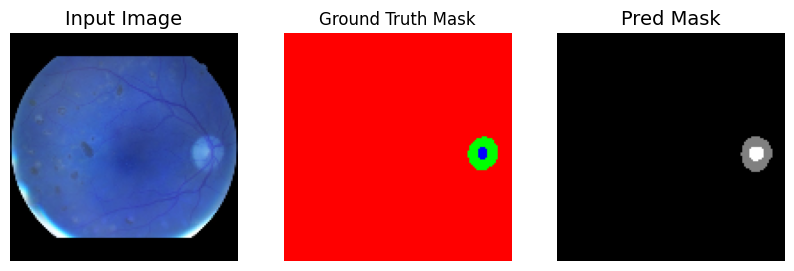

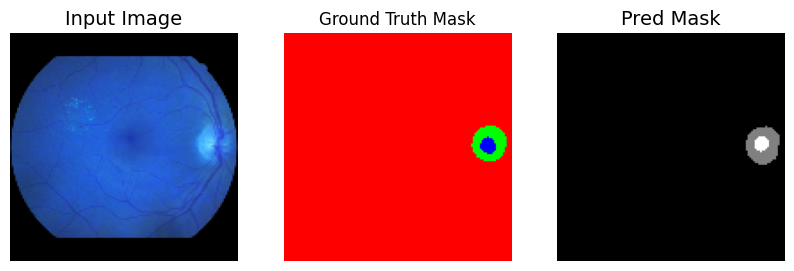

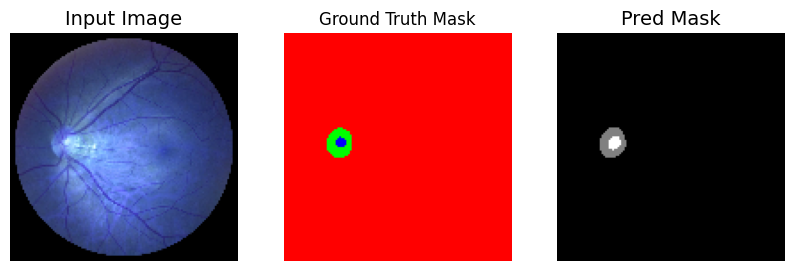

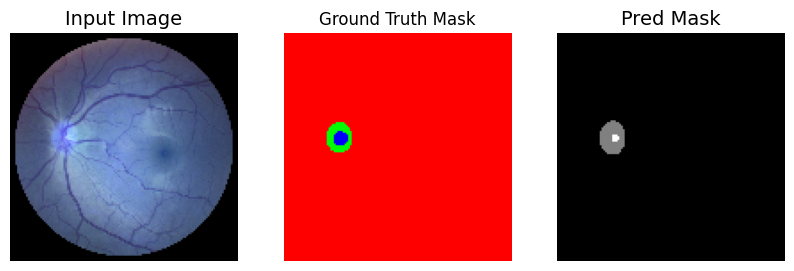

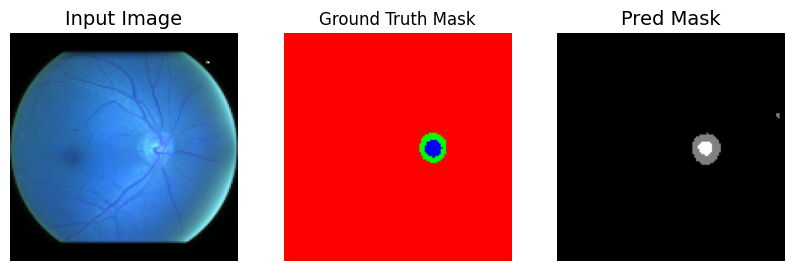

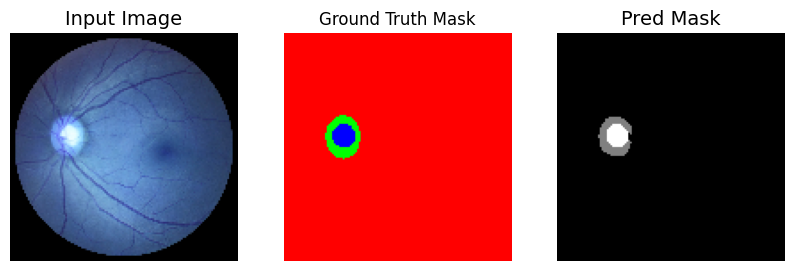

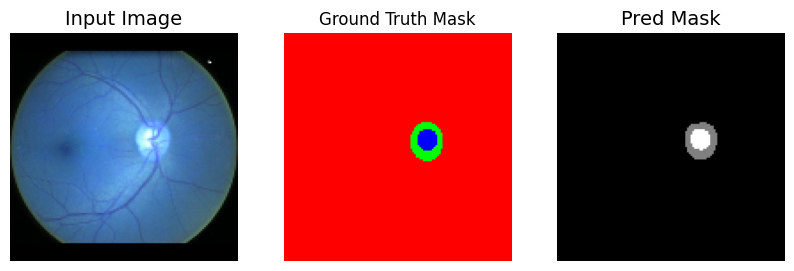

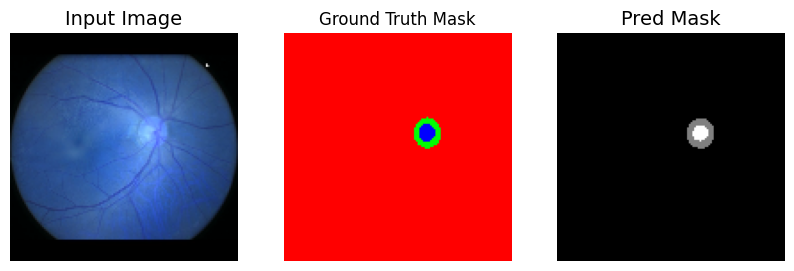

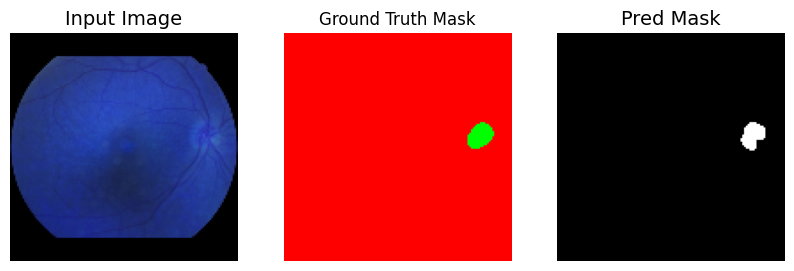

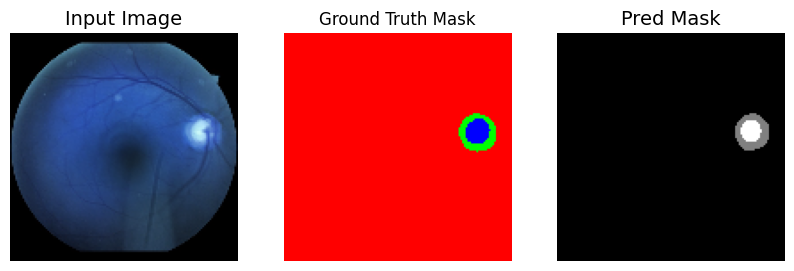

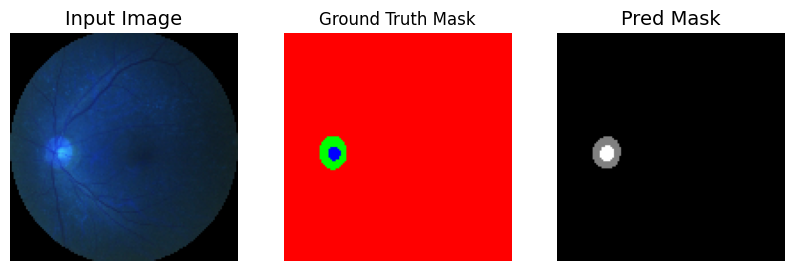

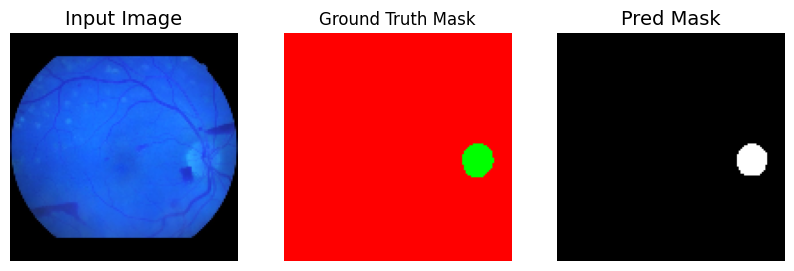

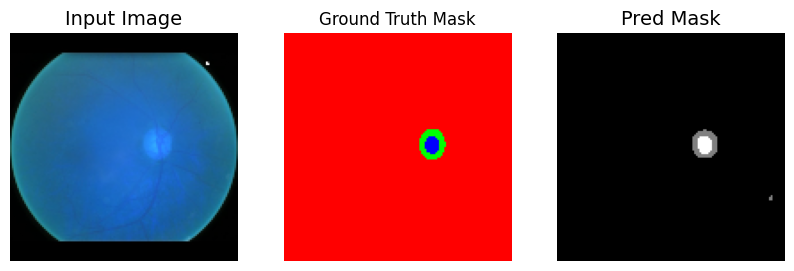

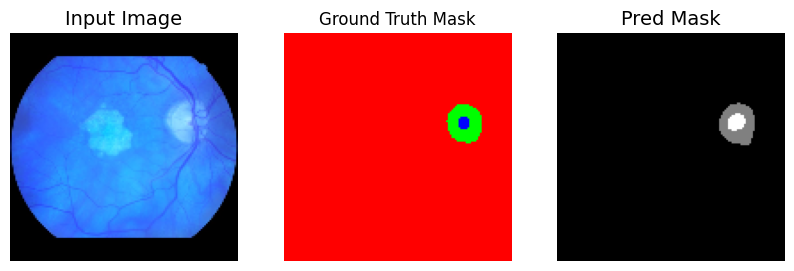

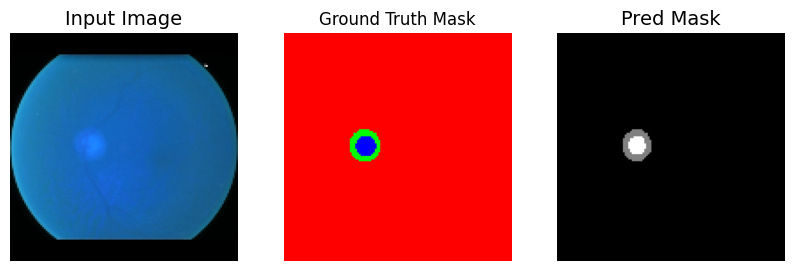

In [ ]:
for i in range(0,25):
    plt.figure(figsize=(10,10))
    plt.axis('Off')
    test_image = x_test[i, :, :]
    plt.subplot(1,3,1)
    plt.imshow(test_image)
    plt.title('Input Image', fontsize=14)
    plt.axis('off')

    test_mask=y_test[i,:,:]
    plt.subplot(1,3,2)
    plt.imshow(test_mask)
    plt.title('Ground Truth Mask')
    plt.axis('off')

    test_mask = preds_test_thresh[i, :, :]
    plt.subplot(1,3,3)
    plt.imshow(test_mask, cmap='gray')
    plt.title('Pred Mask', fontsize=14)
    plt.axis('off')

18/18 [==============================] - 1s 32ms/step


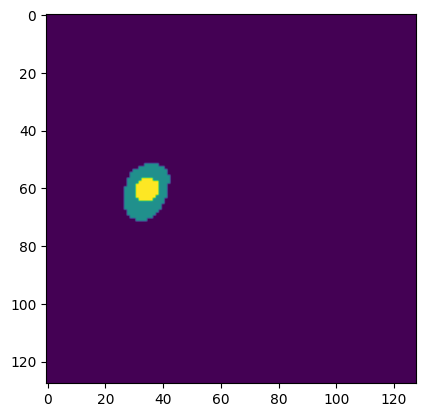

In [ ]:
test_preds = model.predict(x_test)
preds_test_thresh = (np.argmax(test_preds,axis=-1)).astype(np.uint8)
test_img = preds_test_thresh[0, :, :]
plt.imshow(test_img)

1/1 [==============================] - 0s 29ms/step


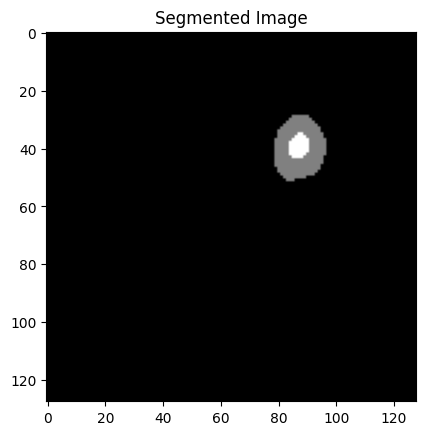

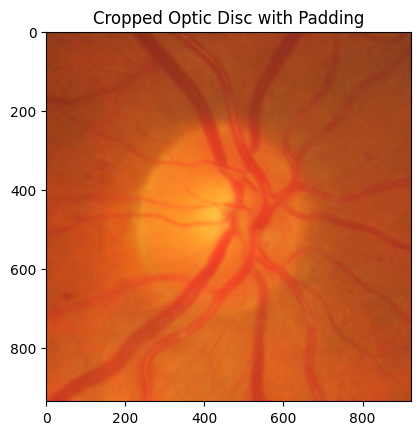

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = '/kaggle/input/glaucoma-datasets/G1020/Images/image_0.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
resized_image = cv2.resize(original_image, (128, 128))


normalized_image = resized_image / 255.0


input_image = np.expand_dims(normalized_image, axis=0)


preds = model.predict(input_image)
preds_label = np.argmax(preds, axis=-1).astype(np.uint8)


segmented_img = preds_label[0, :, :]
plt.imshow(segmented_img, cmap='gray')
plt.title("Segmented Image")
plt.show()


contours, _ = cv2.findContours(segmented_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
optic_disc_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(optic_disc_contour)


padding = 250


scale_x = original_image.shape[1] / 128
scale_y = original_image.shape[0] / 128


x = int(max(x * scale_x - padding, 0))
y = int(max(y * scale_y - padding, 0))
w = int(w * scale_x + 2 * padding)
h = int(h * scale_y + 2 * padding)


x2 = min(x + w, original_image.shape[1])
y2 = min(y + h, original_image.shape[0])
w = x2 - x
h = y2 - y


cropped_image = original_image[y:y+h, x:x+w]

cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)


plt.imshow(cropped_image_rgb)
plt.title("Cropped Optic Disc with Padding")
plt.show()


In [ ]:
# Specify the path where you want to save the image
save_path = '/kaggle/working/cropped_optic_disc.jpg'

# Save the cropped image
cv2.imwrite(save_path, cv2.cvtColor(cropped_image_rgb, cv2.COLOR_RGB2BGR))  # Convert from RGB back to BGR for saving

print(f"Image saved at {save_path}")


Image saved at /kaggle/working/cropped_optic_disc.jpg
